# Notebook for division into Financial, Health and Trade help

In [42]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scripts import *
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [43]:
raw_df = pd.read_csv('../data/country-data.csv')
raw_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Financial

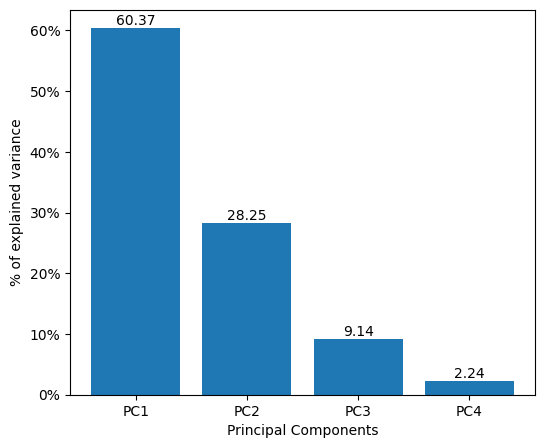

,PC1,PC2,PC3,PC4
0,-0.142246,-0.108152,0.013531,-0.002668
1,-0.096879,-0.025934,-0.038536,0.013910
2,-0.147035,0.131619,0.041899,0.001056
3,-0.223076,0.190929,0.081792,-0.048686
4,-0.006841,0.040420,-0.065805,0.010418


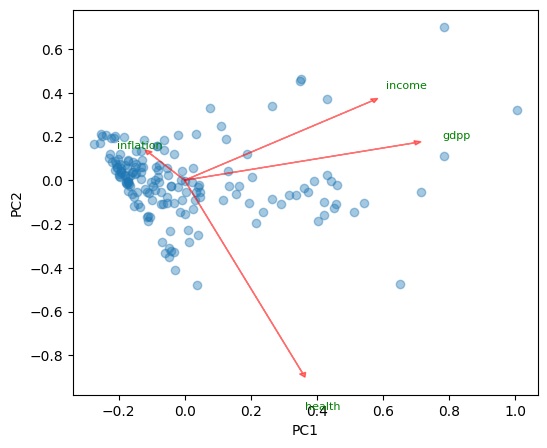

In [44]:
scaler = 'minmax'
raw_df_financial = raw_df.drop(columns=["child_mort", "exports", "imports", "life_expec", "total_fer"])
countries, df_financial, pca = pre_process_data(raw_df_financial, pca=True, scaler=scaler, pca_components=4, plot_scree_plot=True, biplot=True)
df_financial.head()

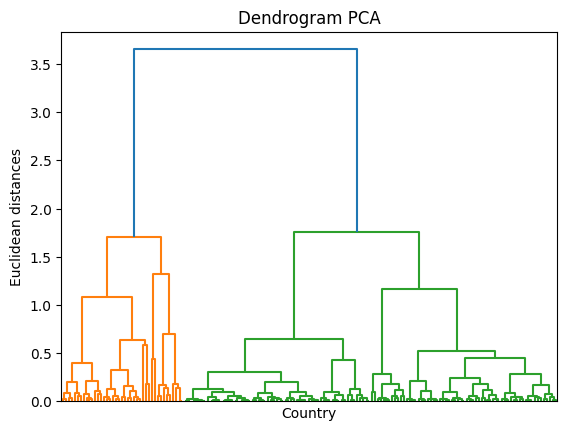

In [45]:
df_financial.index = raw_df.country
df_financial.drop(columns=["PC3", "PC4"], inplace=True)
dendrogram = create_dendrogram(df_financial) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram PCA') # title of the dendrogram
plt.xlabel('Country') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.xticks([])
plt.show()

In [46]:
df_financial_clustering = apply_hierarchical_clustering(df_financial, 2)
df_financial_clustering

,PC1,PC2,cluster
country,,,
Afghanistan,-0.142246,-0.108152,0
Albania,-0.096879,-0.025934,0
Algeria,-0.147035,0.131619,0
Angola,-0.223076,0.190929,0
Antigua and Barbuda,-0.006841,0.040420,0
...,...,...,...
Vanuatu,-0.164686,0.021532,0
Venezuela,-0.084420,0.154393,0
Vietnam,-0.143221,-0.053424,0


In [47]:
s, c, d = evalutate_clusters(df_financial_clustering.reset_index(drop=True))
print(s)

0.5409181553632736


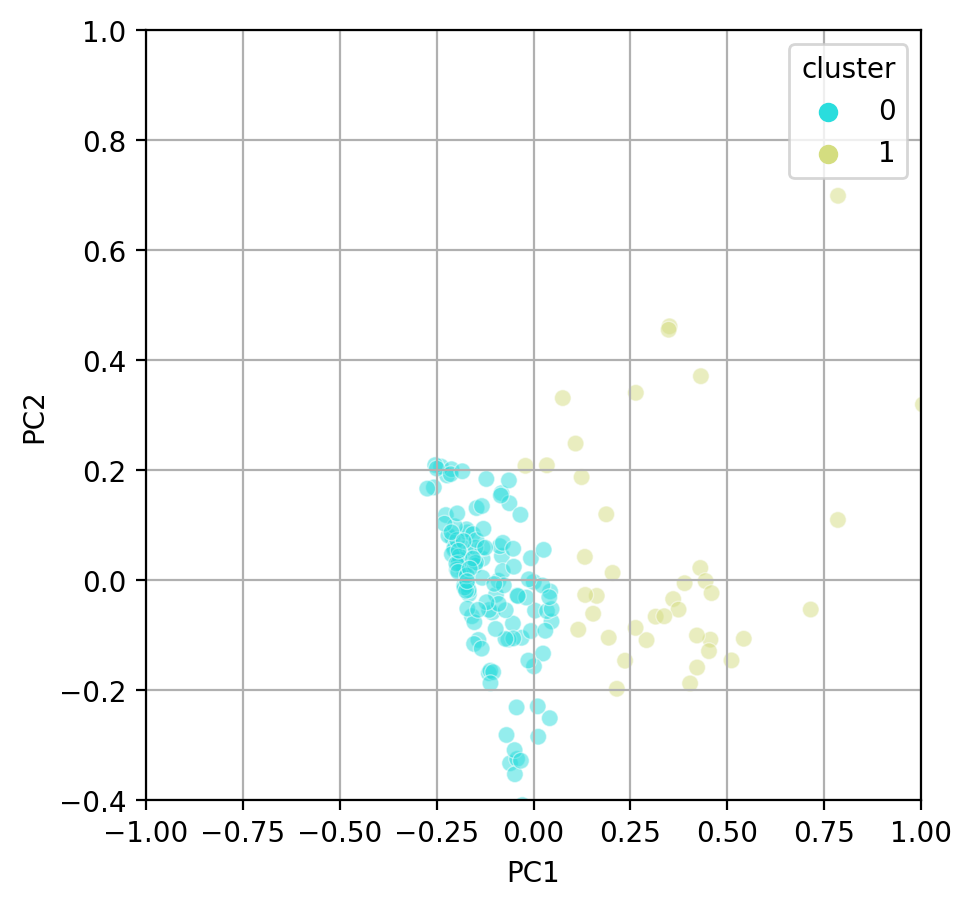

In [48]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=200)
sns.scatterplot(x='PC1', y='PC2', data=df_financial_clustering, hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.xlim(-1,1)
plt.ylim(-0.4,1)
plt.show()

In [49]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

df_financial_clustering["name"] = df_financial_clustering.index

create_map_plot(df_financial_clustering, "../out/Kamil/financial")

# Health

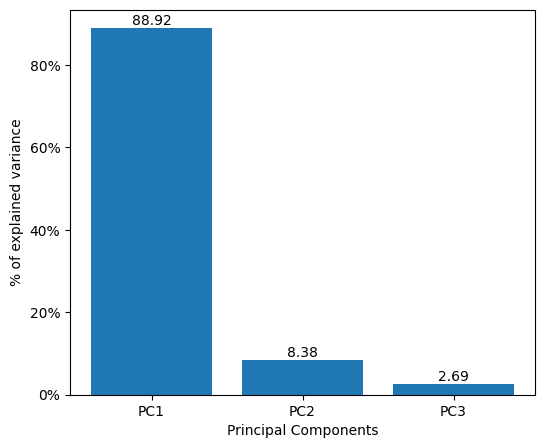

,PC1,PC2,PC3
0,0.583369,-0.061821,-0.071856
1,-0.251759,0.039958,0.030015
2,-0.091877,-0.084154,0.034045
3,0.661927,-0.101759,0.071973
4,-0.222385,-0.029984,-0.001848


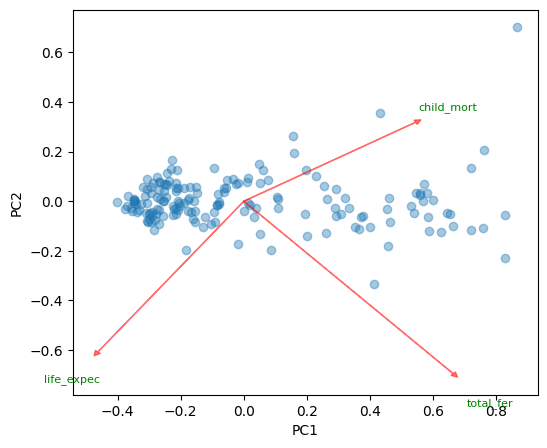

In [50]:
scaler = 'minmax'
raw_df_health = raw_df.drop(columns=["gdpp", "income", "inflation", "health", "imports", "exports"])
countries, df_health, pca = pre_process_data(raw_df_health, pca=True, scaler=scaler, pca_components=3, plot_scree_plot=True, biplot=True)
df_health.head()

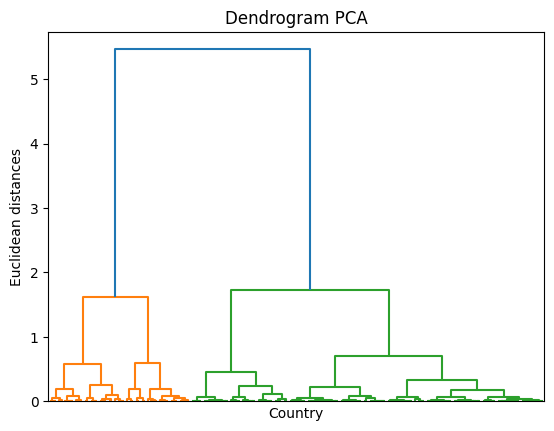

In [51]:
df_health.index = raw_df.country
df_health.drop(columns=["PC2", "PC3"], inplace=True)
dendrogram = create_dendrogram(df_health) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram PCA') # title of the dendrogram
plt.xlabel('Country') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.xticks([])
plt.show()

In [52]:
df_health_clustering = apply_hierarchical_clustering(df_health, 2)
df_health_clustering

,PC1,cluster
country,,
Afghanistan,0.583369,1
Albania,-0.251759,0
Algeria,-0.091877,0
Angola,0.661927,1
Antigua and Barbuda,-0.222385,0
...,...,...
Vanuatu,0.104958,0
Venezuela,-0.154345,0
Vietnam,-0.171406,0


In [53]:
s, c, d = evalutate_clusters(df_health_clustering.reset_index(drop=True))
print(s)

0.7169439356791999


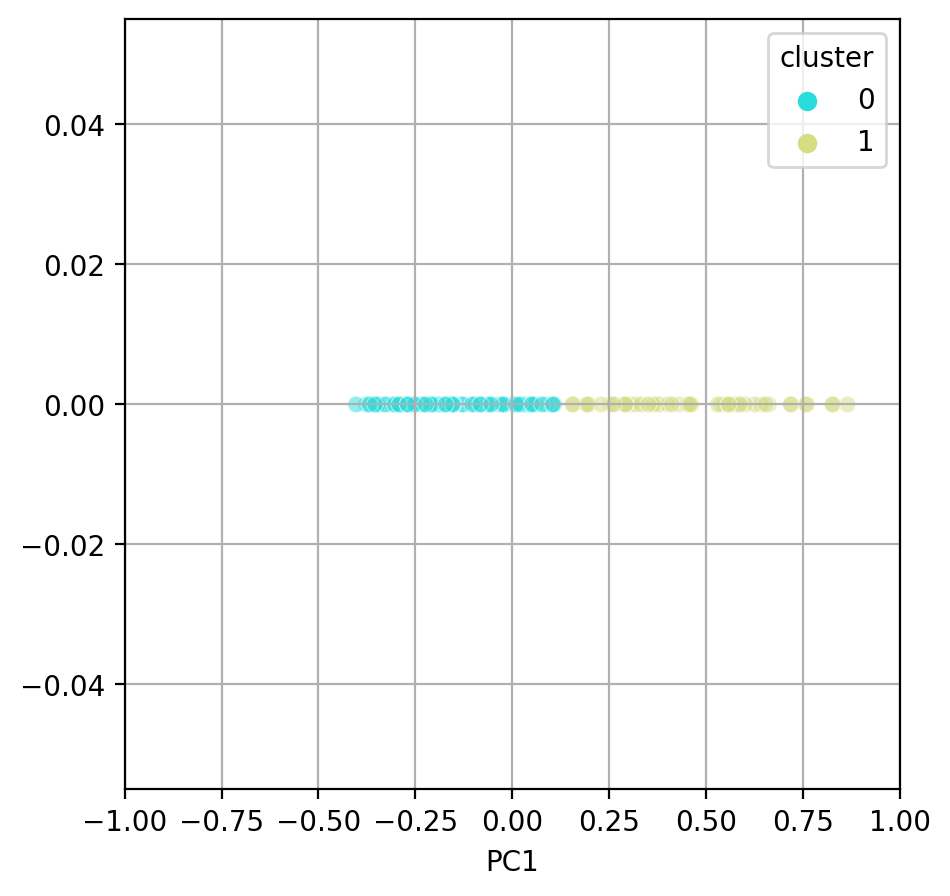

In [54]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=200)
sns.scatterplot(df_health_clustering, x='PC1', y=np.zeros(len(df_health_clustering)), hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.grid()
plt.xlim(-1,1)
plt.show()

In [55]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

df_health_clustering["name"] = df_health_clustering.index

create_map_plot(df_health_clustering, "../out/Kamil/health")

# Trade

In [56]:
scaler = 'minmax'
raw_df_trade = raw_df.drop(columns=["country", "child_mort", "life_expec", "total_fer", "gdpp", "income", "inflation", "health"])
raw_df_trade["trade_ratio"] = raw_df_trade["imports"] / raw_df_trade["imports"].mean() + raw_df_trade["exports"] / raw_df_trade["exports"].mean()
scaler = MinMaxScaler()
df_trade = pd.DataFrame(scaler.fit_transform(raw_df_trade), columns=raw_df_trade.columns)
df_trade

,exports,imports,trade_ratio
0,0.049482,0.257765,0.338168
1,0.139531,0.279037,0.114402
2,0.191559,0.180149,0.039821
3,0.311125,0.246266,0.029332
4,0.227079,0.338255,0.078558
...,...,...,...
162,0.232582,0.302609,0.065266
163,0.142032,0.100809,0.023559
164,0.359651,0.460715,0.063884
165,0.149536,0.197397,0.066547


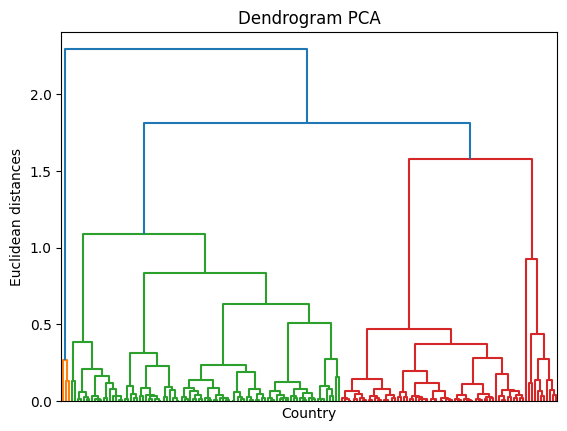

In [57]:
df_trade.index = raw_df.country
dendrogram = create_dendrogram(df_trade) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram PCA') # title of the dendrogram
plt.xlabel('Country') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.xticks([])
plt.show()

In [58]:
df_trade_clustering = apply_hierarchical_clustering(df_trade, 3)
df_trade_clustering

,exports,imports,trade_ratio,cluster
country,,,,
Afghanistan,0.049482,0.257765,0.338168,0
Albania,0.139531,0.279037,0.114402,2
Algeria,0.191559,0.180149,0.039821,0
Angola,0.311125,0.246266,0.029332,2
Antigua and Barbuda,0.227079,0.338255,0.078558,2
...,...,...,...,...
Vanuatu,0.232582,0.302609,0.065266,2
Venezuela,0.142032,0.100809,0.023559,0
Vietnam,0.359651,0.460715,0.063884,2


In [59]:
s, c, d = evalutate_clusters(df_trade_clustering.reset_index(drop=True))
print(s)

0.3389109792840819


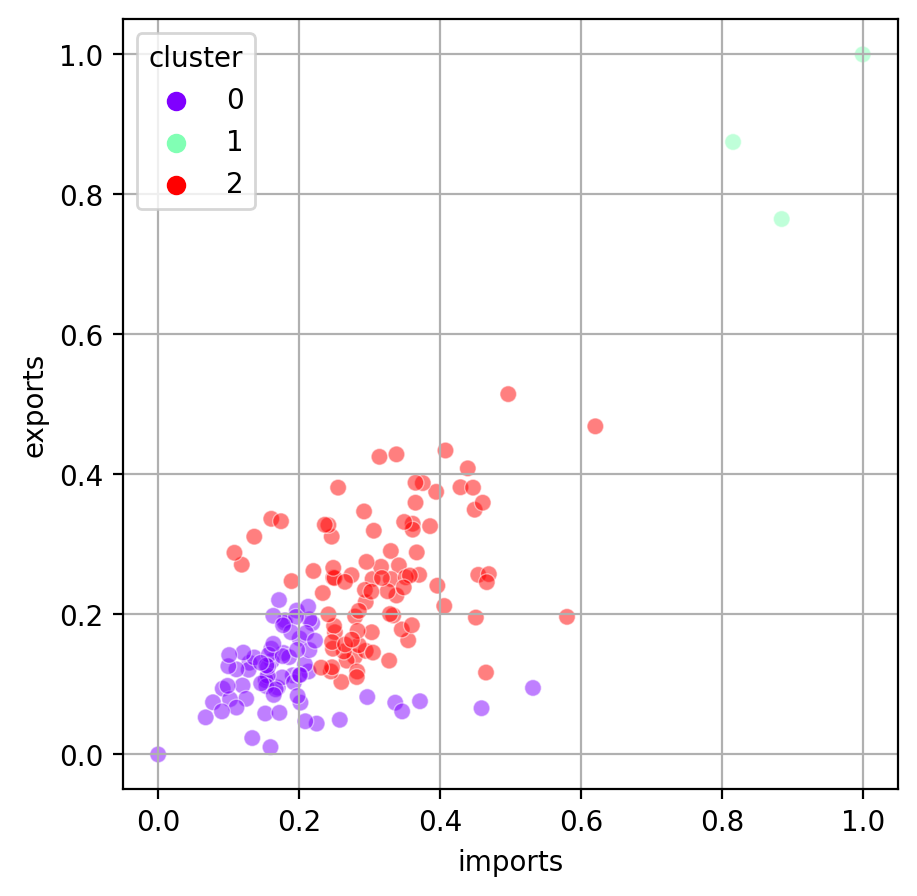

In [60]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=200)
sns.scatterplot(df_trade_clustering, x='imports', y="exports", hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('imports')
plt.ylabel('exports')
plt.grid()
plt.show()

In [61]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

df_trade_clustering["name"] = df_trade_clustering.index

create_map_plot(df_trade_clustering, "../out/Kamil/trade")

In [62]:
df_trade_clustering.loc[df_trade_clustering["cluster"] == 2]

,exports,imports,trade_ratio,cluster,name
country,,,,,
Albania,0.139531,0.279037,0.114402,2,Albania
Angola,0.311125,0.246266,0.029332,2,Angola
Antigua and Barbuda,0.227079,0.338255,0.078558,2,Antigua and Barbuda
Armenia,0.103511,0.260065,0.150326,2,Armenia
Austria,0.256095,0.274438,0.049088,2,Austria
...,...,...,...,...,...
Turkmenistan,0.381163,0.255465,0.020771,2,Turkmenistan
Ukraine,0.235083,0.293411,0.061531,2,Ukraine
United Arab Emirates,0.388167,0.365277,0.039888,2,United Arab Emirates
